In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import data as wb
import datetime
import seaborn as sns
sns.set()

In [2]:
monthly_return = pd.read_csv("F:/Data Science practice/Blog/Beginner's guide Series/Investment strategy/Historical Return.csv")

monthly_return

,Date,Price,Monthly Return (%),Total Investment (£)
0,31/01/1990,329.08,-12.52,437.40
1,02/03/1990,335.54,2.85,964.12
2,01/04/1990,339.94,2.03,1493.84
3,01/05/1990,332.25,-2.81,1937.81
4,31/05/1990,361.23,12.04,2731.32
...,...,...,...,...
373,20/09/2020,3319.47,-3.35,932664.79
374,20/10/2020,3443.12,7.10,999419.49
375,19/11/2020,3581.87,5.66,1056514.93
376,19/12/2020,3709.41,5.31,1113142.42


In [3]:
#change the dates in strings to datetime, so the graphs change scale accordingly
monthly_return["Date"]  = pd.to_datetime(monthly_return["Date"])

monthly_return

,Date,Price,Monthly Return (%),Total Investment (£)
0,1990-01-31,329.08,-12.52,437.40
1,1990-02-03,335.54,2.85,964.12
2,1990-01-04,339.94,2.03,1493.84
3,1990-01-05,332.25,-2.81,1937.81
4,1990-05-31,361.23,12.04,2731.32
...,...,...,...,...
373,2020-09-20,3319.47,-3.35,932664.79
374,2020-10-20,3443.12,7.10,999419.49
375,2020-11-19,3581.87,5.66,1056514.93
376,2020-12-19,3709.41,5.31,1113142.42


### Now work out if we invest perfectly (sell at the peak and buy at the lows)

In [4]:
ticker = ["^GSPC"]
hist_stockprice = pd.DataFrame()

#identify the lowest stock prices in the duration
start_date = datetime.date(1990,1,1)
end_date = datetime.date(2021,1,20)


hist_stockprice[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = start_date, end = end_date)["Adj Close"]

hist_stockprice = hist_stockprice.reset_index()

hist_stockprice

,Date,^GSPC
0,1990-01-02,359.690002
1,1990-01-03,358.760010
2,1990-01-04,355.670013
3,1990-01-05,352.200012
4,1990-01-08,353.790009
...,...,...
7819,2021-01-13,3809.840088
7820,2021-01-14,3795.540039
7821,2021-01-15,3768.250000
7822,2021-01-19,3798.909912


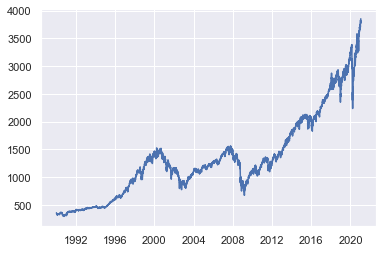

In [5]:
plt.plot(hist_stockprice["Date"], hist_stockprice["^GSPC"])
plt.show()

In [6]:
start_date = datetime.date(2000,1,1)
end_date = datetime.date(2003,12, 31)
stock_2000 = pd.DataFrame()

stock_2000[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = start_date, end = end_date)["Adj Close"]

stock_2000 = stock_2000.reset_index()
stock_2000

,Date,^GSPC
0,2000-01-03,1455.219971
1,2000-01-04,1399.420044
2,2000-01-05,1402.109985
3,2000-01-06,1403.449951
4,2000-01-07,1441.469971
...,...,...
999,2003-12-24,1094.040039
1000,2003-12-26,1095.890015
1001,2003-12-29,1109.479980
1002,2003-12-30,1109.640015


In [7]:
#finding stock price peak in the 2000s - dataframe
max_price = stock_2000[ stock_2000["^GSPC"] ==  stock_2000["^GSPC"].max()]
max_price

,Date,^GSPC
57,2000-03-24,1527.459961


In [8]:
#finding stock price peak in the 2000s- dataframe
min_price = stock_2000[stock_2000["^GSPC"] == stock_2000["^GSPC"].min()]
min_price

,Date,^GSPC
694,2002-10-09,776.76001


In [9]:
#finding stock price peak in 2008 - dataframe
start_date = datetime.date(2000,3,24)
end_date = datetime.date(2012,1, 1)
stock_2008 = pd.DataFrame()

stock_2008[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = start_date, end = end_date)["Adj Close"]

stock_2008 = stock_2008.reset_index()
stock_2008

max_price2008 = stock_2008[stock_2008["^GSPC"] ==  stock_2008["^GSPC"].max()]
max_price2008

,Date,^GSPC
1895,2007-10-09,1565.150024


In [10]:
min_price2008 = stock_2008[stock_2008["^GSPC"] == stock_2008["^GSPC"].min()]
min_price2008

,Date,^GSPC
2250,2009-03-09,676.530029


In [11]:
#finding stock price peak in 2020 - dataframe
start_date = datetime.date(2019,12,31)
end_date = datetime.date(2020,6, 1)
stock_2020 = pd.DataFrame()

stock_2020[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = start_date, end = end_date)["Adj Close"]

stock_2020 = stock_2020.reset_index()

max_price2020 = stock_2020[stock_2020["^GSPC"] ==  stock_2020["^GSPC"].max()]
max_price2020

,Date,^GSPC
33,2020-02-19,3386.149902


In [12]:
min_price2020 = stock_2020[stock_2020["^GSPC"] == stock_2020["^GSPC"].min()]
min_price2020

,Date,^GSPC
56,2020-03-23,2237.399902


In [13]:
#Calculate total fund investment accumulation before crash in 2000s (assume 30 day/month)
def fund_acc(start_date, crash_date): 
    ticker = ["^GSPC"]
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = start_date, end = crash_date)["Adj Close"]
    invest_acc = round(len(data) / 30, 0) * 500
    return invest_acc

fund_acc("1990-01-01", "2002-10-09")


53500.0

In [14]:
#investment growth by selling at the peak before crash
def selling_return (initial_invest, start_date, peak_date): 
    ticker = ["^GSPC"]
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source = "yahoo", start = start_date, end = peak_date)["Adj Close"]
    daily_ret = (data/data.shift(1) - 1).mean()
    total_ret = float(daily_ret * len(data))
    selling_return = initial_invest * (1 + total_ret)
    return selling_return

selling_return(500, "1990-01-01", "2000-03-24")

1277.0011619085576

In [15]:
#investment gain before crash in 2002
invest_gain2000 = round(selling_return(500, "1990-01-01", "2000-03-24"), 2)

#investment gain before crash in 2008 (assume buying at the crash with all fund accumulated)
fund_acc2000 = fund_acc("1990-01-01", "2002-10-09")
invest_gain2008 = round(selling_return((invest_gain2000 + fund_acc2000), "2002-10-09", "2007-10-09"), 2)

#investment gain before crash in 2020 (assume buying at the crash with all fund accumulated)
fund_acc2008 = fund_acc("2002-10-09", "2009-03-09")
invest_gain2020 = round(selling_return((invest_gain2008 + fund_acc2008), "2009-03-09", "2020-02-19"), 2)

invest_gain2020

336861.63

In [16]:
date = ["1990-01-01", "2000-03-24", "2007-10-09", "2020-02-19"]
total_invest = [0, invest_gain2000, invest_gain2008, invest_gain2020]

perfect_invest = pd.DataFrame({"Date" : date, 
                              "Total Investment (£)" : total_invest})

perfect_invest

,Date,Total Investment (£)
0,1990-01-01,0.00
1,2000-03-24,1277.00
2,2007-10-09,95720.02
3,2020-02-19,336861.63


In [17]:
perfect_invest["Date"]  = pd.to_datetime(perfect_invest["Date"])

perfect_invest

,Date,Total Investment (£)
0,1990-01-01,0.00
1,2000-03-24,1277.00
2,2007-10-09,95720.02
3,2020-02-19,336861.63


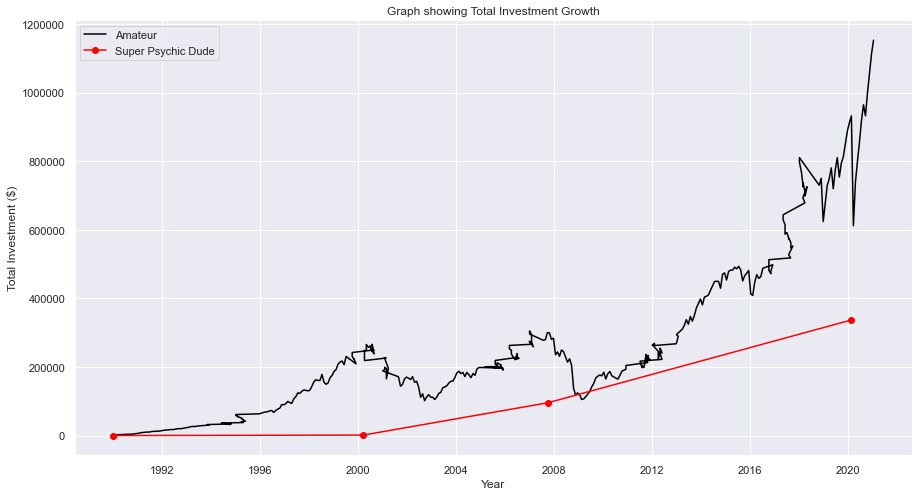

In [21]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(monthly_return["Date"], monthly_return["Total Investment (£)"], color = "black", label = "Amateur")
ax.plot(perfect_invest["Date"], perfect_invest["Total Investment (£)"], color = "red", marker = "o", label = "Super Psychic Dude")
plt.title("Graph showing Total Investment Growth")
plt.xlabel("Year")
plt.ylabel("Total Investment ($)")
plt.legend()
ax.ticklabel_format(axis = "y", style = "plain")
plt.savefig("F:/Data Science practice/Blog/Beginner's guide Series/Investment strategy/Investment growth comparison.png")

plt.show()